In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\Fifa_Worldcup_2010_Group.csv')
rk = pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\fifa_ranking-2022-10-06.csv')
mt=pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\results.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Group                 32 non-null     object
 1   Team                  32 non-null     object
 2   Country_Name_Short    32 non-null     object
 3   First match against   32 non-null     object
 4   Second match against  32 non-null     object
 5   Third match against   32 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB


In [4]:
df.head(10)

,Group,Team,Country_Name_Short,First match against,Second match against,Third match against
0,A,South Africa,RSA,Mexico,Uruguay,France
1,A,Mexico,MEX,South Africa,France,Uruguay
2,A,Uruguay,URU,France,South Africa,Mexic
3,A,France,FRA,Uruguay,Mexico,South Africa
4,B,Argentina,ARG,Nigeria,South Korea,Greece
5,B,Nigeria,NGA,Argentina,Grrece,South Korea
6,B,South Korea,KOR,Grrece,Argentina,Nigeria
7,B,Grrece,GRE,South Korea,Nigeria,Argentina
8,C,England,ENG,United States,Algeria,Solovenia
9,C,United States,USA,England,Slovenia,Algeria


In [5]:
df.isnull().values.any()

False

In [6]:
df.isna().sum()

Group                   0
Team                    0
Country_Name_Short      0
First match against     0
Second match against    0
Third match against     0
dtype: int64

In [7]:
df['Group'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [8]:
rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63916 entries, 0 to 63915
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             63916 non-null  int64  
 1   country_full     63916 non-null  object 
 2   country_abrv     63916 non-null  object 
 3   total_points     63916 non-null  float64
 4   previous_points  63916 non-null  float64
 5   rank_change      63916 non-null  int64  
 6   confederation    63916 non-null  object 
 7   rank_date        63916 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


In [9]:
rk.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,12/31/1992
1,96,Syria,SYR,11.0,0.0,0,AFC,12/31/1992
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,12/31/1992
3,99,Latvia,LVA,10.0,0.0,0,UEFA,12/31/1992
4,100,Burundi,BDI,10.0,0.0,0,CAF,12/31/1992
5,101,Togo,TOG,10.0,0.0,0,CAF,12/31/1992
6,102,Angola,ANG,10.0,0.0,0,CAF,12/31/1992
7,95,Suriname,SUR,12.0,0.0,0,CONCACAF,12/31/1992
8,103,Luxembourg,LUX,10.0,0.0,0,UEFA,12/31/1992
9,105,St. Vincent and the Grenadines,VIN,9.0,0.0,0,CONCACAF,12/31/1992


In [10]:
mt.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [11]:
rk['country_abrv'].unique()

array(['GER', 'SYR', 'BFA', 'LVA', 'BDI', 'TOG', 'ANG', 'SUR', 'LUX',
       'VIN', 'FIJ', 'MOZ', 'IDN', 'ATG', 'JOR', 'SWZ', 'FRO', 'LTU',
       'UGA', 'PRK', 'PER', 'SLE', 'TAN', 'NIG', 'IRQ', 'GUA', 'LBR',
       'ETH', 'ALB', 'BOL', 'BHR', 'SGP', 'CGO', 'MAS', 'SDN', 'CRO',
       'BRB', 'YEM', 'CPV', 'SOL', 'LBY', 'BOT', 'BRU', 'DOM', 'LES',
       'IND', 'CUB', 'PAK', 'BLR', 'SEY', 'CTA', 'NEP', 'GAM', 'MTN',
       'KEN', 'BAN', 'SVN', 'OMA', 'GNB', 'LCA', 'HKG', 'PAN', 'GRN',
       'PUR', 'TAH', 'RSA', 'VEN', 'SMR', 'BEN', 'GUY', 'UKR', 'HAI',
       'EST', 'THA', 'MRI', 'MLT', 'EGY', 'CMR', 'SCO', 'USA', 'MEX',
       'BUL', 'CIV', 'WAL', 'YUG', 'ALG', 'GRE', 'ZAM', 'POR', 'AUT',
       'COL', 'BEL', 'HUN', 'TCH', 'URU', 'MAD', 'ITA', 'BRA', 'SWE',
       'ENG', 'IRL', 'NED', 'RUS', 'DEN', 'ARG', 'ROU', 'SUI', 'NGA',
       'NOR', 'ESP', 'FRA', 'CRC', 'POL', 'CYP', 'CAN', 'BER', 'UAE',
       'ZAI', 'IRN', 'GUI', 'ISR', 'ECU', 'JPN', 'JAM', 'PAR', 'MLI',
       'NZL', 'KUW',

In [12]:
result = rk.groupby('country_abrv')['total_points'].sum()

In [13]:
result

country_abrv
AFG     55322.70
AIA     33264.44
ALB    162745.60
ALG    192109.31
AND     66876.16
         ...    
YEM     85187.46
YUG     33665.00
ZAI      7344.00
ZAM    163424.78
ZIM    136368.81
Name: total_points, Length: 217, dtype: float64

In [14]:
mt['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Juan Pinto Durán', 'Arab Cup',
       'South Pacific Ga

In [15]:
mt.shape

(44060, 9)

In [16]:
mt = mt[mt['tournament'] != 'Friendly']
mt.shape

(26635, 9)

In [17]:
rk['rank_date'] = pd.to_datetime(rk['rank_date'])
mt['date'] = pd.to_datetime(mt['date'])

In [18]:
import datetime

rk['year'] = rk['rank_date'].dt.year
mt['year'] = mt['date'].dt.year
rankings_sub = rk[rk['rank_date'] > '2005-08-24']
matches_sub = mt[mt['date'] > '2005-08-24']

In [19]:
rankings_sub = rankings_sub[['rank', 'country_full', 'total_points', 'year']]
rankings_sub = rankings_sub.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean', 'total_points': 'mean'})

matches_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
28083,2005-09-02,Libya,Sudan,0.0,0.0,FIFA World Cup qualification,Tripoli,Libya,False,2005
28084,2005-09-03,Albania,Kazakhstan,2.0,1.0,FIFA World Cup qualification,Tirana,Albania,False,2005
28085,2005-09-03,Andorra,Finland,0.0,0.0,FIFA World Cup qualification,Sant Julià de Lòria,Andorra,False,2005
28086,2005-09-03,Armenia,Netherlands,0.0,1.0,FIFA World Cup qualification,Yerevan,Armenia,False,2005
28087,2005-09-03,Australia,Solomon Islands,7.0,0.0,FIFA World Cup qualification,Sydney,Australia,False,2005


In [20]:
matches_all = matches_sub.merge(rankings_sub, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all = matches_all.merge(rankings_sub, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all.drop(['date', 'tournament', 'city', 'country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
matches_all.head()

,home_team,away_team,home_score,away_score,neutral,rank_x,total_points_x,rank_y,total_points_y
0,Libya,Sudan,0.0,0.0,False,81.75,524.00,93.0,486.75
1,Djibouti,Sudan,0.0,4.0,True,200.75,37.50,93.0,486.75
2,Ethiopia,Sudan,3.0,1.0,True,124.00,365.25,93.0,486.75
3,Somalia,Sudan,1.0,4.0,True,187.00,94.50,93.0,486.75
4,Albania,Kazakhstan,2.0,1.0,False,84.50,516.25,140.5,313.25


In [21]:
matches_all['total_diff'] = matches_all['total_points_x'] - matches_all['total_points_y']
matches_all['rank_diff'] = matches_all['rank_x'] - matches_all['rank_y']
matches_all['neutral'] = matches_all['neutral'].astype(int)
matches_all['is_win'] = (matches_all['home_score'] - matches_all['away_score']).apply(lambda x: 1 if x>0 else 0)
train = matches_all.drop(['home_team', 'away_team', 'home_score', 'away_score'], axis=1)
train.head()

,neutral,rank_x,total_points_x,rank_y,total_points_y,total_diff,rank_diff,is_win
0,0,81.75,524.00,93.0,486.75,37.25,-11.25,0
1,1,200.75,37.50,93.0,486.75,-449.25,107.75,0
2,1,124.00,365.25,93.0,486.75,-121.50,31.00,1
3,1,187.00,94.50,93.0,486.75,-392.25,94.00,0
4,0,84.50,516.25,140.5,313.25,203.00,-56.00,1


In [22]:
train_X = train.drop('is_win', axis=1)
train_y = train['is_win']

In [23]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [25]:
classifiers = {'Random Forest': RandomForestClassifier(n_estimators=300),
              'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=.01),
              'Logistic Regression': LogisticRegression(C=1e-5)}

Running Random Forest
Running LightGBM
Running Logistic Regression


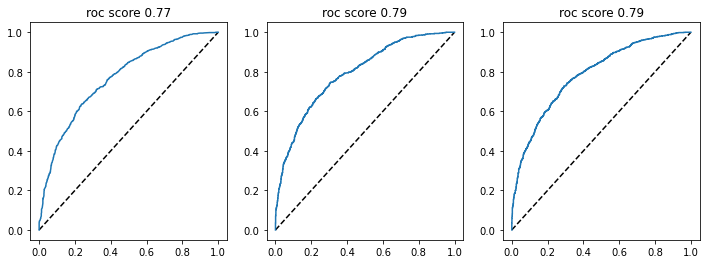

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3)

fig = plt.figure(figsize=[12, 4])
for i, (name, clf) in enumerate(classifiers.items()):
    print('Running', name)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    # plot
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr)
    ax.set_title('roc score {0:.2f}'.format(roc_auc_score(y_test, y_pred)))

<AxesSubplot:title={'center':'y_pred'}, xlabel='[y_true]'>

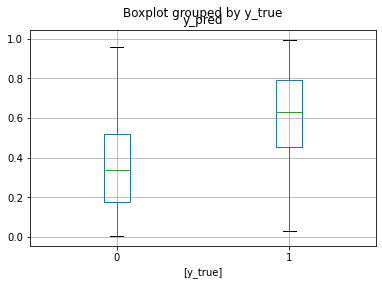

In [27]:
pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}).boxplot(by='y_true')

In [28]:
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(train_X, train_y)

lr = LogisticRegression(C=1e-5)
lr = lr.fit(train_X, train_y)

lgb = LGBMClassifier(n_estimators=300, learning_rate=.01)
lgb = lgb.fit(train_X, train_y)

Strong team not always wins, higher probability only gives better wining chance

In [29]:
world_cup_rankings = df[['Team', 'Group']]
world_cup_rankings = world_cup_rankings.merge(rankings_sub[rankings_sub['year']==2010], left_on='Team', right_on='country_full')
world_cup_rankings.drop('country_full', axis=1, inplace=True)
world_cup_rankings = world_cup_rankings.set_index('Team')
world_cup_rankings.head()

,Group,year,rank,total_points
Team,,,,
South Africa,A,2010,69.636364,465.909091
Mexico,A,2010,22.090909,868.909091
Uruguay,A,2010,12.000000,1048.090909
France,A,2010,60.000000,524.545455
Argentina,B,2010,6.363636,1213.000000


In [30]:
world_cup_rankings['Points'] = 0
for group in world_cup_rankings['Group'].unique():
    print('*******************************')
    print('Simulating Group', group)
    group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
    for home, away in combinations(group_teams, 2):
        print('//*************************//')
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['total_points_x'] = world_cup_rankings.loc[home, 'total_points']
        row['rank_x'] = world_cup_rankings.loc[home, 'rank']
        row['total_points_y'] = world_cup_rankings.loc[away, 'total_points']
        row['rank_y'] = world_cup_rankings.loc[away, 'rank']
        row['total_diff'] = row['total_points_x'] - row['total_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
        # if y_pred in [0.4, 0.55] then draw
        if (y_pred > 0.4) & (y_pred < 0.55):
            print('Draw')
            world_cup_rankings.loc[home, 'Points'] += 1
            world_cup_rankings.loc[away, 'Points'] += 1
        else:
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                world_cup_rankings.loc[home, 'Points'] += 3
                print('{} wins!'.format(home))
            else:
                world_cup_rankings.loc[away, 'Points'] += 3
                print('{} wins!'.format(away))

*******************************
Simulating Group A
//*************************//
South Africa vs Mexico
Mexico wins!
//*************************//
South Africa vs Uruguay
Uruguay wins!
//*************************//
South Africa vs France
France wins!
//*************************//
Mexico vs Uruguay
Uruguay wins!
//*************************//
Mexico vs France
Mexico wins!
//*************************//
Uruguay vs France
Uruguay wins!
*******************************
Simulating Group B
//*************************//
Argentina vs Nigeria
Nigeria wins!
*******************************
Simulating Group C
//*************************//
England vs Algeria
Draw
//*************************//
England vs Slovenia
Draw
//*************************//
Algeria vs Slovenia
Algeria wins!
*******************************
Simulating Group D
//*************************//
Germany vs Australia
Germany wins!
//*************************//
Germany vs Serbia
Draw
//*************************//
Germany vs Ghana
Draw
//**

In [31]:
world_cup_rankings

,Group,year,rank,total_points,Points
Team,,,,,
South Africa,A,2010,69.636364,465.909091,0
Mexico,A,2010,22.090909,868.909091,6
Uruguay,A,2010,12.000000,1048.090909,9
France,A,2010,60.000000,524.545455,3
Argentina,B,2010,6.363636,1213.000000,0
Nigeria,B,2010,26.545455,809.727273,3
England,C,2010,7.090909,1139.272727,2
Algeria,C,2010,32.181818,763.818182,4
Slovenia,C,2010,21.909091,875.181818,1


In [32]:
final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
final_teams.set_index('Team', inplace=True)
final_teams

,Group,year,rank,total_points,Points
Team,,,,,
Uruguay,A,2010,12.000000,1048.090909,9
Mexico,A,2010,22.090909,868.909091,6
Nigeria,B,2010,26.545455,809.727273,3
Argentina,B,2010,6.363636,1213.000000,0
Algeria,C,2010,32.181818,763.818182,4
England,C,2010,7.090909,1139.272727,2
Germany,D,2010,4.636364,1327.272727,5
Serbia,D,2010,17.181818,922.363636,5
Netherlands,E,2010,2.636364,1493.636364,6


In [33]:
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]

In [34]:
final_teams = final_teams.iloc[pairing]

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
for f in finals:
    print('######################################')
    print('Simulation of {}'.format(f))
    winners = []
    rds = int(len(final_teams)/2)
    for i in range(rds):
        home = final_teams.index[2*i]
        away = final_teams.index[2*i+1]
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['total_points_x'] = final_teams.loc[home, 'total_points']
        row['rank_x'] = final_teams.loc[home, 'rank']
        row['total_points_y'] = final_teams.loc[away, 'total_points']
        row['rank_y'] = final_teams.loc[away, 'rank']
        row['total_diff'] = row['total_points_x'] - row['total_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
       
         # give a sense of randomness
        is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
        if is_win:
            winners.append(home)
            print('{} wins!'.format(home))
        else:
            winners.append(away)
            print('{} wins!'.format(away))
    final_teams = final_teams.loc[winners]
print('*******************************')
print('The Champion of 2010 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))

######################################
Simulation of round_of_16
Uruguay vs Argentina
Argentina wins!
Algeria vs Serbia
Serbia wins!
Mexico vs Nigeria
Nigeria wins!
England vs Germany
Germany wins!
Netherlands vs Slovakia
Netherlands wins!
Brazil vs Chile
Chile wins!
Japan vs Paraguay
Paraguay wins!
Portugal vs Spain
Spain wins!
######################################
Simulation of quarterfinal
Argentina vs Serbia
Argentina wins!
Nigeria vs Germany
Germany wins!
Netherlands vs Chile
Netherlands wins!
Paraguay vs Spain
Spain wins!
######################################
Simulation of semifinal
Argentina vs Germany
Germany wins!
Netherlands vs Spain
Spain wins!
######################################
Simulation of final
Germany vs Spain
Spain wins!
*******************************
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!


### So one simulation may have some kind of accident, compile the whole simulation process to perform multiple simulations

In [35]:
def pred_wining(dat, home, away):
    row = pd.DataFrame(columns=train_X.columns)
    row.loc[0, 'neutral'] = 1
    row['total_points_x'] = dat.loc[home, 'total_points']
    row['rank_x'] = dat.loc[home, 'rank']
    row['total_points_y'] = dat.loc[away, 'total_points']
    row['rank_y'] = dat.loc[away, 'rank']
    row['total_diff'] = row['total_points_x'] - row['total_points_y']
    row['rank_diff'] = row['rank_x'] - row['rank_y']
    
    y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
    return y_pred

def main():
    # Group Stage
    world_cup_rankings['Points'] = 0
    for group in world_cup_rankings['Group'].unique():
        group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
        for home, away in combinations(group_teams, 2):
            # get wining probability
            y_pred = pred_wining(world_cup_rankings, home, away)
            # if y_pred in [0.4, 0.55] then draw
            if (y_pred > 0.4) & (y_pred < 0.55):
                world_cup_rankings.loc[home, 'Points'] += 1
                world_cup_rankings.loc[away, 'Points'] += 1
            else:
                # give a sense of randomness
                is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
                if is_win:
                    world_cup_rankings.loc[home, 'Points'] += 3
                else:
                    world_cup_rankings.loc[away, 'Points'] += 3
    # Eliminating Stage
    final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
    final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
    final_teams.set_index('Team', inplace=True)
    final_teams = final_teams.iloc[pairing]
    
    for f in finals:
        winners = []
        rds = int(len(final_teams)/2)
        for i in range(rds):
            home = final_teams.index[2*i]
            away = final_teams.index[2*i+1]
            y_pred = pred_wining(world_cup_rankings, home, away)
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                winners.append(home)
            else:
                winners.append(away)
        final_teams = final_teams.loc[winners]
    print('The Champion of 2010 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))
    return winners[0]

In [36]:
num_simulations = 100
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]
finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

In [37]:
if __name__ == '__main__':
    champions = []
    for sim in range(num_simulations):
        print('######## Simulation {} ########'.format(sim+1))
        champions.append(main())

######## Simulation 1 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 2 ########
The Champion of 2010 World Cup is Cameroon!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 3 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 4 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 5 ########
The Champion of 2010 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 6 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 7 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 8 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 9 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 10 ########
The Champion of 2010 World Cup is Chile!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 11 ########
The Champion of 2010 W

The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 87 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 88 ########
The Champion of 2010 World Cup is Switzerland!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 89 ########
The Champion of 2010 World Cup is England!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 90 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 91 ########
The Champion of 2010 World Cup is Brazil!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 92 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 93 ########
The Champion of 2010 World Cup is Serbia!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 94 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 95 ########
The Champion of 2010 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 96 ########
The Champion of 2010 World Cup is Portug

In [38]:
import gc
gc.collect()

504

<AxesSubplot:title={'center':'World Cup Champion 2010'}>

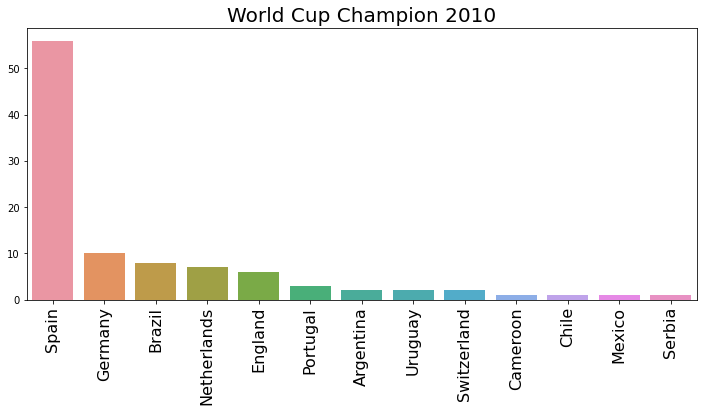

In [39]:
from collections import Counter
import operator
import matplotlib
import seaborn as sns

sorted_champ = Counter(champions).most_common()

fig, ax = plt.subplots(figsize=[12, 5])
plt.xticks(rotation=90, size=16)
ax.set_title('World Cup Champion 2010', size=20)
sns.barplot(x=[t[0] for t in sorted_champ], y=[t[1] for t in sorted_champ], ax=ax)